In [1]:
%matplotlib inline

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

In [31]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

Generate some random data

In [75]:
size = 10
data = np.random.uniform(0, 1, size = (size, size), )
covar_matrix = np.ones((size, size))

## The dumb (wrong) way

In [78]:
for i in range(size):
    for j in range(i + 1, size):
        covar_matrix[i, j] = np.random.uniform(0, 1)

covar_matrix = np.multiply(covar_matrix, covar_matrix.T)

# You want to use np.allclose() to avoid any floating point comparison errors.
np.allclose(covar_matrix, covar_matrix.T), np.real(np.linalg.eigvals(covar_matrix))

(True, array([ 3.57783836,  1.5099548 , -0.07435346,  0.13039576,  1.20097545,
         0.474266  ,  0.55262319,  0.71092742,  0.89175637,  1.02561611]))

## The proper (correct) way

In [79]:
data_symm = data.T @ data + np.diag(np.ones(size))
covar_matrix = np.multiply(np.multiply(data_symm, np.diag(1/np.sqrt(data_symm))).T, np.diag(1/np.sqrt(data_symm)))
np.allclose(covar_matrix, covar_matrix.T), np.linalg.eigvals(covar_matrix)

(True, array([ 6.21466739,  0.7479358 ,  0.57083647,  0.55165667,  0.2376973 ,
         0.25430858,  0.26758317,  0.35180567,  0.41564694,  0.38786201]))

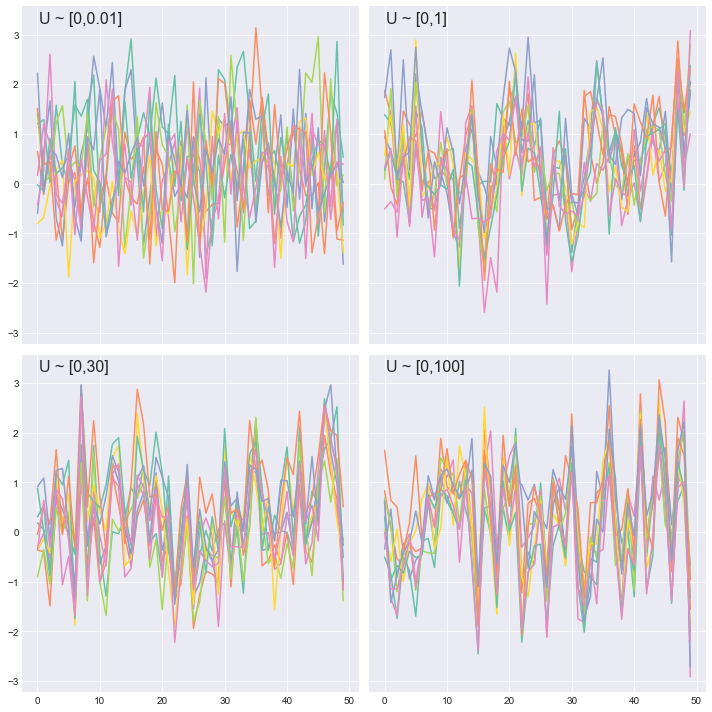

In [87]:
f, axes = plt.subplots(2,2,figsize=(10,10), sharey=True, sharex=True)
dists = squareform(pdist(data, 'euclidean'))
dists

for high, ax in zip([0.01, 1, 30, 100], axes.ravel()):
    data2 = np.random.uniform(0, high, size = (size, size))
    data_symm = data2.T @ data2 + np.diag(np.ones(size))
    covar_matrix = np.multiply(np.multiply(data_symm, np.diag(1/np.sqrt(data_symm))).T, np.diag(1/np.sqrt(data_symm)))
    
    samples = np.random.multivariate_normal(np.random.uniform(size=size),cov = covar_matrix, size = 50)
    ax.plot(samples)
    ax.annotate("U ~ [{},{}]".format(0, high), xy=(0.05, 0.95), xycoords="axes fraction", fontsize=16)
plt.tight_layout()
plt.savefig("../../sidravi1.github.io/assets/2014_04_09_correct.png")

## The fun (correct) way

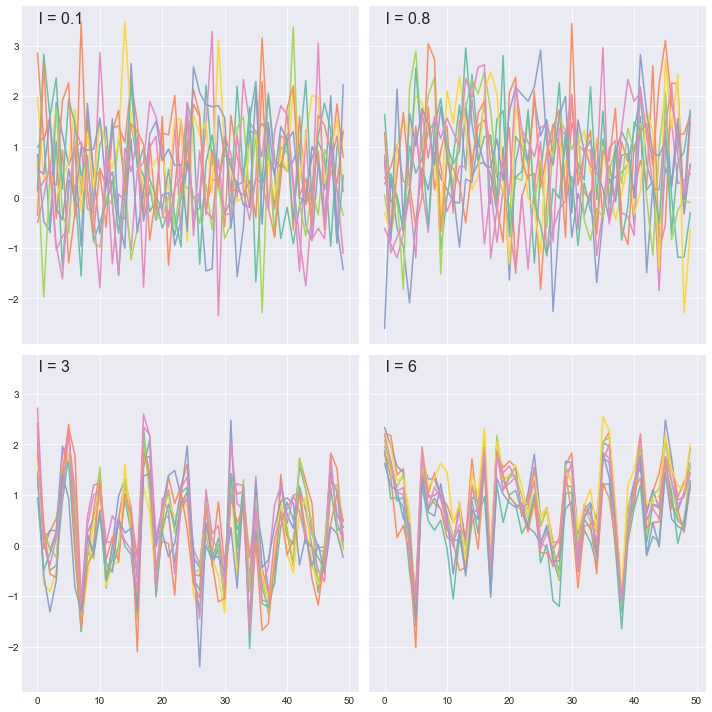

In [85]:
f, axes = plt.subplots(2,2,figsize=(10,10), sharey=True, sharex=True)
dists = squareform(pdist(data, 'euclidean'))
dists

for l, ax in zip([0.1, 0.8, 3, 6], axes.ravel()):
    covar_matrix = np.exp(-dists ** 2 / l ** 2)
    samples = np.random.multivariate_normal(np.random.uniform(size=size),cov = covar_matrix, size = 50)
    ax.plot(samples)
    ax.annotate("l = {}".format(l), xy=(0.05, 0.95), xycoords="axes fraction", fontsize=16)
plt.tight_layout()
plt.savefig("../../sidravi1.github.io/assets/2014_04_09_funway.png")